In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'DATASET.csv'

In [3]:
data = pd.read_csv(path)

In [4]:
data.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


In [6]:
data.isna().sum()

Review    16
label      0
dtype: int64

In [7]:
data[(data.isnull())['Review']]

,Review,label
49679,NaN,POSITIVE
49690,NaN,POSITIVE
49747,NaN,POSITIVE
50005,NaN,POSITIVE
50397,NaN,POSITIVE
50437,NaN,POSITIVE
50802,NaN,POSITIVE
50883,NaN,POSITIVE
50972,NaN,POSITIVE
50973,NaN,POSITIVE


In [8]:
data.dropna(inplace=True,axis=0)

In [9]:
data.isnull().sum()

Review    0
label     0
dtype: int64

<Axes: >

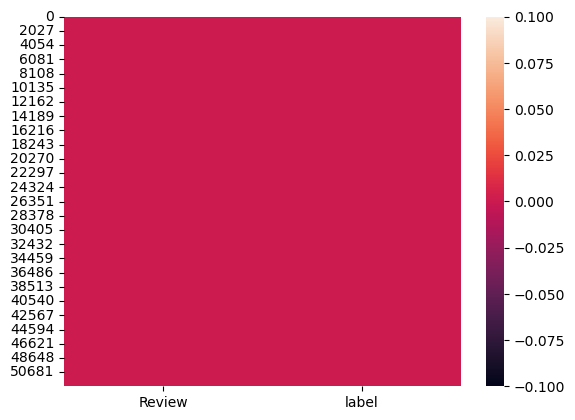

In [10]:
sns.heatmap(data.isna())

In [11]:
data['label'].unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [12]:
data['label'].value_counts()

label
NEGATIVE    29423
POSITIVE    23263
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

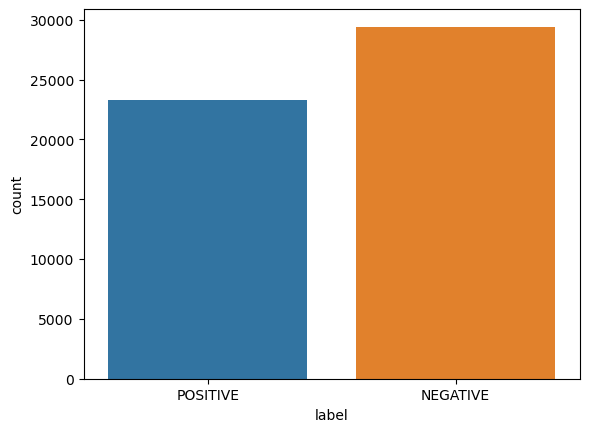

In [13]:
sns.countplot(x='label',data=data)

In [14]:
#!pip install ydata_profiling

In [15]:
from ydata_profiling import ProfileReport

report = ProfileReport(data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Logistic regression, SVM, Bert, Multinomial Bayes, Random Forest

In [17]:
data[data.duplicated()]

,Review,label
1848,Way too many ads,NEGATIVE
2391,Good app for songs,POSITIVE
2871,I love Spotify.,POSITIVE
2883,Too many ads,NEGATIVE
3020,Too much ads,NEGATIVE
...,...,...
52689,I love this app,POSITIVE
52691,Nice,POSITIVE
52692,Nice,POSITIVE
52694,You know why,POSITIVE


In [18]:
df = data.copy()

In [19]:
df['label'].replace('NEGATIVE',0,inplace=True)
df['label'].replace('POSITIVE',1,inplace=True)

In [20]:
import regex as re


In [21]:
caracteres_speciaux = re.findall(r"[^a-zA-Z0-9\s]", df['Review'][0])
text = re.sub(r'[^a-zA-Z0-9\s]+', ' ', df['Review'][283])

In [22]:
text

'I really like a sound hello everyone have a nice day  Stay safe always god bless '

In [23]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

In [24]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize
#nltk.download('punkt') : kaggle has this pre-downloaded so no need to download.

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens



In [25]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

In [26]:
df['Review'] = df['Review'].apply(clean_text) #applying the clean_text function to Review column

In [27]:
df['Tokens'] = df['Review'].apply(tokenize_text)

In [28]:
df['Lemmatized_Tokens'] = df['Tokens'].apply(lemmatize_tokens)


In [29]:
pd.set_option('display.max_colwidth', None) #to view text fully and so that
#pandas doesn't truncate the text

print(df.iloc[283]['Review'])

i really like a sound hello everyone have a nice day stay safe always god bless


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

#performing TF-IDF vectorization
def apply_tfidf(df):
    df['TFIDF_Tokens'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['TFIDF_Tokens'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

# Applying TF-IDF on our Dataframe
tfidf_matrix, feature_names = apply_tfidf(df)
df.head(10)

,Review,label,Tokens,Lemmatized_Tokens,TFIDF_Tokens
0,great music service the audio is high quality and the app is easy to use also very quick and friendly support,1,"[great, music, service, the, audio, is, high, quality, and, the, app, is, easy, to, use, also, very, quick, and, friendly, support]","[great, music, service, the, audio, be, high, quality, and, the, app, be, easy, to, use, also, very, quick, and, friendly, support]",great music service the audio be high quality and the app be easy to use also very quick and friendly support
1,please ignore previous negative rating this app is super great i give it five stars,1,"[please, ignore, previous, negative, rating, this, app, is, super, great, i, give, it, five, stars]","[please, ignore, previous, negative, rat, this, app, be, super, great, i, give, it, five, star]",please ignore previous negative rat this app be super great i give it five star
2,this pop up get the best spotify experience on android 12 is too annoying please let s get rid of this,0,"[this, pop, up, get, the, best, spotify, experience, on, android, 12, is, too, annoying, please, let, s, get, rid, of, this]","[this, pop, up, get, the, best, spotify, experience, on, android, 12, be, too, annoy, please, let, s, get, rid, of, this]",this pop up get the best spotify experience on android 12 be too annoy please let s get rid of this
3,really buggy and terrible to use as of recently,0,"[really, buggy, and, terrible, to, use, as, of, recently]","[really, buggy, and, terrible, to, use, as, of, recently]",really buggy and terrible to use as of recently
4,dear spotify why do i get songs that i didn t put on my playlist and why do we have shuffle play,0,"[dear, spotify, why, do, i, get, songs, that, i, didn, t, put, on, my, playlist, and, why, do, we, have, shuffle, play]","[dear, spotify, why, do, i, get, songs, that, i, didn, t, put, on, my, playlist, and, why, do, we, have, shuffle, play]",dear spotify why do i get songs that i didn t put on my playlist and why do we have shuffle play
5,the player controls sometimes disappear for no reason app restart forgets what i was playing but fixes the issue,0,"[the, player, controls, sometimes, disappear, for, no, reason, app, restart, forgets, what, i, was, playing, but, fixes, the, issue]","[the, player, control, sometimes, disappear, for, no, reason, app, restart, forget, what, i, be, play, but, fix, the, issue]",the player control sometimes disappear for no reason app restart forget what i be play but fix the issue
6,i love the selection and the lyrics are provided with the song you re listening to,1,"[i, love, the, selection, and, the, lyrics, are, provided, with, the, song, you, re, listening, to]","[i, love, the, selection, and, the, lyric, be, provide, with, the, song, you, re, listen, to]",i love the selection and the lyric be provide with the song you re listen to
7,still extremely slow when changing storage to external sd card i m convinced this is done on purpose spotify knows of this issue and has done nothing to solve it over time i have changed sd cards each being faster in read write speeds all samsung brand and please add don t like song so it will never appear again in my searches or playlists,0,"[still, extremely, slow, when, changing, storage, to, external, sd, card, i, m, convinced, this, is, done, on, purpose, spotify, knows, of, this, issue, and, has, done, nothing, to, solve, it, over, time, i, have, changed, sd, cards, each, being, faster, in, read, write, speeds, all, samsung, brand, and, please, add, don, t, like, song, so, it, will, never, appear, again, in, my, searches, or, playlists]","[still, extremely, slow, when, change, storage, to, external, sd, card, i, m, convince, this, be, do, on, purpose, spotify, know, of, this, issue, and, have, do, nothing, to, solve, it, over, time, i, have, change, sd, card, each, be, faster, in, read, write, speed, all, samsung, brand, and, please, add, don, t, like, song, so, it, will, never, appear, again, in,

In [31]:
feature_names

array(['00', '000', '001', ..., 'zulu', 'zumo', 'zuri'], dtype=object)

In [32]:
tfidf_matrix

<52686x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 596602 stored elements in Compressed Sparse Row format>

In [33]:
from sklearn.model_selection import train_test_split
y = df['label']


In [34]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix
y = df['label']

# Division des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Entraînement du modèle
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5864
           1       0.87      0.85      0.86      4674

    accuracy                           0.88     10538
   macro avg       0.88      0.88      0.88     10538
weighted avg       0.88      0.88      0.88     10538



In [36]:
from sklearn.svm import SVC

# Entraînement du modèle SVM
svm = SVC()
svm.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5864
           1       0.88      0.85      0.87      4674

    accuracy                           0.89     10538
   macro avg       0.88      0.88      0.88     10538
weighted avg       0.89      0.89      0.88     10538



In [37]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement du modèle Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5864
           1       0.88      0.81      0.84      4674

    accuracy                           0.86     10538
   macro avg       0.87      0.86      0.86     10538
weighted avg       0.86      0.86      0.86     10538



In [38]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      5864
           1       0.87      0.81      0.84      4674

    accuracy                           0.86     10538
   macro avg       0.86      0.85      0.86     10538
weighted avg       0.86      0.86      0.86     10538

